# <center> Time Series Analysis of Online Retail

link: https://www.kaggle.com/mashlyn/online-retail-ii-uci


Data collected between 2009 to 2011. Online retailer based in UK mostly whole sale items to other retailers.


See document regarding purpose of this Time Series Analysis:<br>
Link1: https://docs.google.com/document/d/10btwfFVF4_EybOoMRdwWjlWOSOoFqqvYKCHTHk2GMys/edit <br>
Link2: https://docs.google.com/presentation/d/1iAt92m-q1AMGqB5qI6wobUomZ4pM6MxMOZd3P6di1os/edit#slide=id.gae17bbaf4e_0_321


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime as dt
import pmdarima as pmd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
raw_data = pd.read_csv('online_retail_II.csv')

# <center> I. Examine Data

In [3]:
inv_data = raw_data.copy()
inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
Invoice        1067371 non-null object
StockCode      1067371 non-null object
Description    1062989 non-null object
Quantity       1067371 non-null int64
InvoiceDate    1067371 non-null object
Price          1067371 non-null float64
Customer ID    824364 non-null float64
Country        1067371 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
inv_data.head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [5]:
inv_data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

## A. Cleaning Dataset

>#### 1. Examine Missing Contents
>> a. Description<br>
>> b. Customer ID
>#### 2. Eliminate Irrelevant Data/Information
>#### 3. Other Modifications and Information

### a. Missing Contents: Description

In [6]:
inv_data[inv_data['Description'].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


>### Missing information in Description - ok to leave as empty or blank, will not harm data

### b. Missing Contents: Customer ID

In [7]:
inv_data[inv_data['Customer ID'].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [8]:
inv_data['Customer ID'].fillna(0, inplace = True)

>### Missing information in Customer ID - ok to to change to 0, will not harm data

## 2. Eliminate Irrelevant Data or Information

>#### a. Quantity = -1 and StockCode = D (Discount)
>#### b. StockCode = DOT, C2, m, M, B, S, C3
>> Manual inputs, other irrelevant charges such as bank charges and postal
>#### c. Price is 0

### a. Quantity = -1 and StockCode = D (Discount)
>> Get rid of discounts

In [9]:
inv_data = inv_data[(inv_data['Quantity'] != -1) & 
               (inv_data['StockCode'] != 'M')]

### b. Miscellaneous code items
>> Discounts, manual adjustments, bad debt adjustments, postage, bank fees...etc

In [10]:
remove = ['ADJUST','ADJUST2','AMAZONFEE','POST', 'TEST001', 'TEST002', 'gift_0001_10',
 'gift_0001_20', 'gift_0001_30', 'gift_0001_40', 'gift_0001_50', 'gift_0001_70', 'gift_0001_80',
 'DOT', 'C2', 'm', 'B', 'S', 'C3', 'BANK CHARGES', 'D', 'DCGS0003', 'DCGS0004', 'DCGS0037', 
 'DCGS0041', 'DCGS0044', 'DCGS0058', 'DCGS0062', 'DCGS0066N', 'DCGS0068', 'DCGS0069',
 'DCGS0070', 'DCGS0072', 'DCGS0075', 'DCGS0076', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'SP1002']
          

In [11]:
for code in remove:
    inv_data.drop(inv_data[inv_data['StockCode']==code].index, axis = 0, inplace = True)


### c. Price = 0
>> Get rid of miscellaneous items or non-profitable items

In [12]:
inv_data.drop(inv_data[inv_data['Price'] == 0].index, axis = 0, inplace = True)

## 3. Other Modification and Information

### Save Unique Stock Codes and Descriptions of the Stock Code (Item) 

In [13]:
#save stockcode and description information for reference
stock_codes = inv_data['Description'].groupby(inv_data['StockCode']).agg(lambda x: set(x))
stock_codes.head()

StockCode
10002     {INFLATABLE POLITICAL GLOBE }
10002R          {ROBOT PENCIL SHARPNER}
10080        {GROOVY CACTUS INFLATABLE}
10109            {BENDY COLOUR PENCILS}
10120                    {DOGGY RUBBER}
Name: Description, dtype: object

In [14]:
len(stock_codes)

4887

### Add Column Date Time Formatted as Readable Date Time

In [15]:
inv_data['DateTime']= pd.to_datetime(inv_data['InvoiceDate'])

### Add Column Sales (Quantity Times Price)

In [16]:
inv_data['Sales'] = inv_data['Quantity']*inv_data['Price']

### Aggregate Data by Days, Weeks, and Months

In [17]:
inv_data['day'] = inv_data['DateTime'].dt.day
inv_data['week'] = inv_data['DateTime'].dt.week
inv_data['month'] = inv_data['DateTime'].dt.month
inv_data['year'] = inv_data['DateTime'].dt.year
inv_data['quarter'] = inv_data['DateTime'].dt.quarter

In [18]:
inv_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DateTime,Sales,day,week,month,year,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.40,1,49,12,2009,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.00,1,49,12,2009,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.00,1,49,12,2009,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,100.80,1,49,12,2009,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,30.00,1,49,12,2009,4
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,2009-12-01 07:45:00,39.60,1,49,12,2009,4
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,30.00,1,49,12,2009,4
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009-12-01 07:45:00,59.50,1,49,12,2009,4
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009-12-01 07:46:00,30.60,1,49,12,2009,4
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,2009-12-01 07:46:00,45.00,1,49,12,2009,4


In [19]:
days = inv_data[['Description', 
                'StockCode', 
                'Quantity', 
                'Price', 
                'Sales', 
                'DateTime',
                'day',
                'month',
                'year']].groupby(['day',
                                  'month',
                                  'year',
                                  'StockCode']).agg({'Description':lambda x:set(x),
                                                         'Quantity':'sum',
                                                         'Price':'mean',
                                                         'Sales':'sum'})
weeks = inv_data[['Description', 
                'StockCode', 
                'Quantity', 
                'Price', 
                'Sales', 
                'DateTime',
                'week',
                'year']].groupby(['week',
                                  'year',
                                  'StockCode']).agg({'Description':lambda x:set(x),
                                                         'Quantity':'sum',
                                                         'Price':'mean',
                                                         'Sales':'sum'})
months = inv_data[['Description', 
                  'StockCode', 
                  'Quantity', 
                  'Price', 
                  'Sales', 
                  'DateTime',
                  'month',
                  'year']].groupby(['month',
                                        'year', 
                                        'StockCode']).agg({'Description':lambda x:set(x),
                                                           'Quantity':'sum',
                                                           'Price':'mean',
                                                           'Sales':'sum'})
quarterly = inv_data[['Description', 
                     'StockCode', 
                     'Quantity', 
                     'Price', 
                     'Sales', 
                     'DateTime',
                     'quarter',
                     'year']].groupby(['quarter',
                                           'year', 
                                           'StockCode']).agg({'Description':lambda x:set(x),
                                                              'Quantity':'sum',
                                                              'Price':'mean',
                                                              'Sales':'sum'})

In [20]:
days.reset_index(inplace = True)
weeks.reset_index(inplace = True)
months.reset_index(inplace = True)
quarterly.reset_index(inplace = True)

In [21]:
days.sort_values('Quantity').head()

,day,month,year,StockCode,Description,Quantity,Price,Sales
32595,2,12,2010,84347,{ROTATING SILVER ANGELS T-LIGHT HLDR},-17948,1.998571,924.60
490895,28,9,2010,21088,{SET/6 FRUIT SALAD PAPER CUPS},-7128,0.080000,-570.24
490897,28,9,2010,21096,{SET/6 FRUIT SALAD PAPER PLATES},-7008,0.130000,-911.04
490785,28,9,2010,16047,{POP ART PEN CASE & PENS},-5184,0.080000,-414.72
491715,28,9,2010,37340,{MULTICOLOUR SPRING FLOWER MUG},-4992,0.100000,-499.20


In [22]:
weeks.sort_values('Quantity').head()

,week,year,StockCode,Description,Quantity,Price,Sales
178983,48,2010,84347,{ROTATING SILVER ANGELS T-LIGHT HLDR},-17084,2.852063,4033.47
167738,46,2010,18007,{ESSENTIAL BALM 3.5g TIN IN ENVELOPE},-2301,0.204000,-101.93
84710,24,2011,22920,{HERB MARKER BASIL},-1469,0.637500,-803.35
56707,16,2011,47566B,{TEA TIME PARTY BUNTING},-1177,6.888462,-2721.91
51593,15,2010,84270,{ASSTD DESIGN BUBBLE GUM RING},-1170,0.202857,-173.70


In [23]:
 months.sort_values('Quantity').head()

,month,year,StockCode,Description,Quantity,Price,Sales
63803,12,2010,84347,{ROTATING SILVER ANGELS T-LIGHT HLDR},-15302,3.492080,9219.48
19967,4,2011,47566B,{TEA TIME PARTY BUNTING},-938,5.771961,-1561.34
22443,5,2010,79323W,{WHITE CHERRY LIGHTS},-683,6.272059,-4017.45
39617,8,2011,21877,{HOME SWEET HOME MUG},-597,1.568800,-576.69
22441,5,2010,79323P,{PINK CHERRY LIGHTS},-396,6.296154,-2306.30


In [24]:
quarterly.sort_values('Quantity').head()

,quarter,year,StockCode,Description,Quantity,Price,Sales
8332,2,2010,79323W,"{ WHITE CHERRY LIGHTS, WHITE CHERRY LIGHTS}",-779,6.320339,-4530.25
8336,2,2010,79341,{WILLOW BRANCH LIGHTS.},-367,6.469091,-2028.43
15150,3,2010,84925D,{LA PALMIERA WALL THERMOMETER},-361,2.262500,-64.95
8330,2,2010,79323P,{PINK CHERRY LIGHTS},-294,6.365775,-1721.18
16237,3,2011,21439,{BASKET OF TOADSTOOLS},-268,1.395313,-249.01


# <center> II. Visuals

<b> Information is too big to be displayed all at once - will mainly focus on subsets (samples) of entire data

In [25]:
#top 20 items by day
dtop_20 = days[['StockCode', 'Quantity']].groupby('StockCode').agg('sum').sort_values('Quantity',ascending = False).head(20)
dtop_20.reset_index(inplace = True)

#top 20 items by week
wtop_20 = weeks[['StockCode', 'Quantity']].groupby('StockCode').agg('sum').sort_values('Quantity',ascending = False).head(20)
wtop_20.reset_index(inplace = True)

#top 20 items by month
mtop_20 = months[['StockCode', 'Quantity']].groupby('StockCode').agg('sum').sort_values('Quantity',ascending = False).head(20)
mtop_20.reset_index(inplace = True)

#top 20 items by quarterly
qtop_20 = quarterly[['StockCode', 'Quantity']].groupby('StockCode').agg('sum').sort_values('Quantity',ascending = False).head(20)
qtop_20.reset_index(inplace = True)

In [26]:
days_top20 = days[days['StockCode'].isin(list(dtop_20.StockCode))]
weeks_top20 = weeks[weeks['StockCode'].isin(list(wtop_20.StockCode))]
months_top20 = months[days['StockCode'].isin(list(mtop_20.StockCode))]
quarterly_top20 = quarterly[days['StockCode'].isin(list(qtop_20.StockCode))]

C:\Users\D-9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D-9\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [126]:
days_top20.head(20)

,day,month,year,StockCode,Description,Quantity,Price,Sales
1,1,2,2010,15036,{ASSORTED COLOURS SILK FAN},12,0.650000,7.80
47,1,2,2010,20725,{LUNCH BAG RED SPOTTY},22,1.650000,36.30
144,1,2,2010,21212,{PACK OF 72 RETRO SPOT CAKE CASES},33,0.842000,21.80
145,1,2,2010,21213,{PACK OF 72 SKULL CAKE CASES},4,1.036667,4.39
148,1,2,2010,21232,{STRAWBERRY CERAMIC TRINKET BOX},2,2.510000,5.02
344,1,2,2010,21977,{PACK OF 60 PINK PAISLEY CAKE CASES},3,1.280000,3.84
427,1,2,2010,22178,{VICTORIAN GLASS HANGING T-LIGHT},12,1.250000,15.00
438,1,2,2010,22197,"{POPCORN HOLDER , SMALL }",29,1.120000,25.46
519,1,2,2010,22386,{JUMBO BAG PINK WITH WHITE SPOTS},12,1.950000,23.40
652,1,2,2010,84077,{WORLD WAR 2 GLIDERS ASSTD DESIGNS},144,0.210000,30.24


In [129]:
px.line(days_top20,
       x = 'day',
       y = 'Quantity',
       title = 'Daily', 
       color = 'StockCode')

In [127]:
px.line(weeks_top20,
       x = 'week',
       y = 'Quantity',
       title = 'Weekly',
       color = 'StockCode')

### Top Quantities Overall

In [30]:
top20_lst = days_top20.StockCode.unique()
top20_lst

array(['15036', '20725', '21212', '21213', '21232', '21977', '22178',
       '22197', '22386', '84077', '84755', '84879', '84946', '84991',
       '85099B', '85123A', '17003', '22616', '22492', '84568'],
      dtype=object)

In [31]:
#Top 5
px.line(days_top20[days_top20['StockCode'].isin(top20_lst[:5])],
       x = 'day',
       y = 'Quantity',
       color = 'StockCode')

In [32]:
stock_codes[top20_lst[:5]]

StockCode
15036                          {ASSORTED COLOURS SILK FAN}
20725      {LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY}
21212    {PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 72 ...
21213                        {PACK OF 72 SKULL CAKE CASES}
21232    {STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE...
Name: Description, dtype: object

In [33]:
#Top 10
px.line(days_top20[days_top20['StockCode'].isin(top20_lst[:10])],
       x = 'day',
       y = 'Quantity',
       color = 'StockCode')

In [34]:
stock_codes[top20_lst[:10]]

StockCode
15036                          {ASSORTED COLOURS SILK FAN}
20725      {LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY}
21212    {PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 72 ...
21213                        {PACK OF 72 SKULL CAKE CASES}
21232    {STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE...
21977                 {PACK OF 60 PINK PAISLEY CAKE CASES}
22178                    {VICTORIAN GLASS HANGING T-LIGHT}
22197    {POPCORN HOLDER , SMALL , SMALL POPCORN HOLDER...
22386    {JUMBO BAG PINK POLKADOT, JUMBO BAG PINK WITH ...
84077                  {WORLD WAR 2 GLIDERS ASSTD DESIGNS}
Name: Description, dtype: object

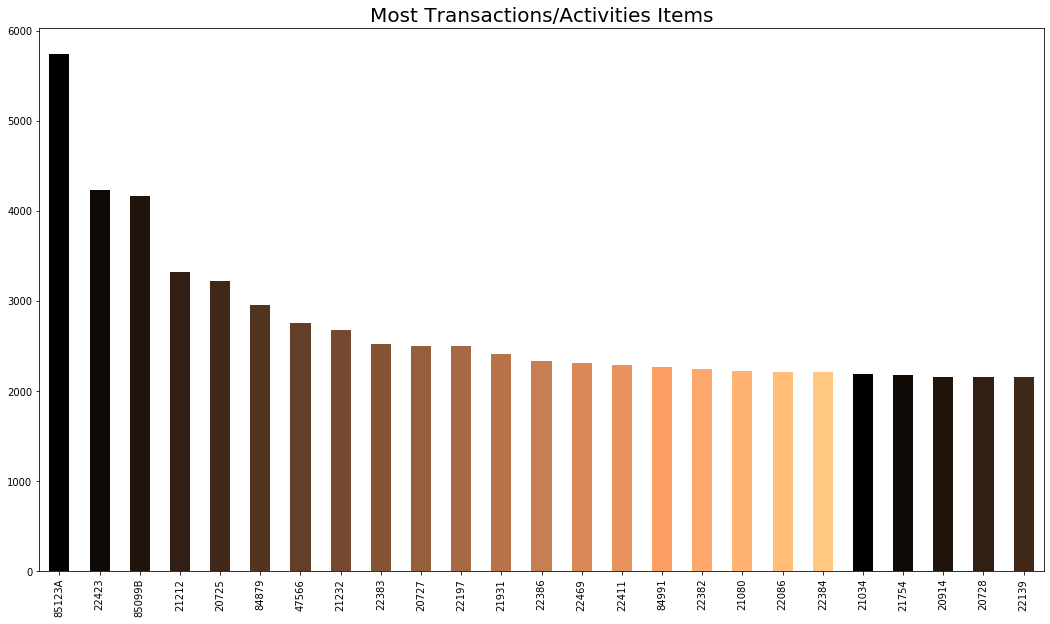

In [35]:
color = plt.cm.copper(np.linspace(0, 1, 20))

inv_data['StockCode'].value_counts().head(25).plot.bar(color = color, figsize = (18, 10))
plt.title('Most Transactions/Activities Items', fontsize = 20)
plt.show()

In [36]:
stock_codes[inv_data['StockCode'].value_counts()[:25].index]

85123A    {WHITE HANGING HEART T-LIGHT HOLDER, CREAM HAN...
22423                            {REGENCY CAKESTAND 3 TIER}
85099B    {JUMBO BAG RED RETROSPOT, JUMBO BAG RED WHITE ...
21212     {PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 72 ...
20725       {LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY}
84879                       {ASSORTED COLOUR BIRD ORNAMENT}
47566                                       {PARTY BUNTING}
21232     {STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE...
22383     {LUNCH BAG SUKI  DESIGN , LUNCH BAG SUKI DESIG...
20727                             {LUNCH BAG  BLACK SKULL.}
22197     {POPCORN HOLDER , SMALL , SMALL POPCORN HOLDER...
21931                              {JUMBO STORAGE BAG SUKI}
22386     {JUMBO BAG PINK POLKADOT, JUMBO BAG PINK WITH ...
22469                               {HEART OF WICKER SMALL}
22411                   {JUMBO SHOPPER VINTAGE RED PAISLEY}
84991                         {60 TEATIME FAIRY CAKE CASES}
22382     {LUNCHBAG SPACEBOY DESIGN , LU

# <center> II. Model Data Set

### Examine Top Items

In [37]:
top20_lst[:5]

array(['15036', '20725', '21212', '21213', '21232'], dtype=object)

In [38]:
item_15036 = inv_data[inv_data['StockCode'].isin(['15036'])]
item_20725 = inv_data[inv_data['StockCode'].isin(['20725'])]
item_21212 = inv_data[inv_data['StockCode'].isin(['21212'])]
item_21213 = inv_data[inv_data['StockCode'].isin(['21213'])]
item_21232 = inv_data[inv_data['StockCode'].isin(['21232'])]

In [39]:
stock_codes[top20_lst[:5]]

StockCode
15036                          {ASSORTED COLOURS SILK FAN}
20725      {LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY}
21212    {PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 72 ...
21213                        {PACK OF 72 SKULL CAKE CASES}
21232    {STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE...
Name: Description, dtype: object

### Test for Stationary

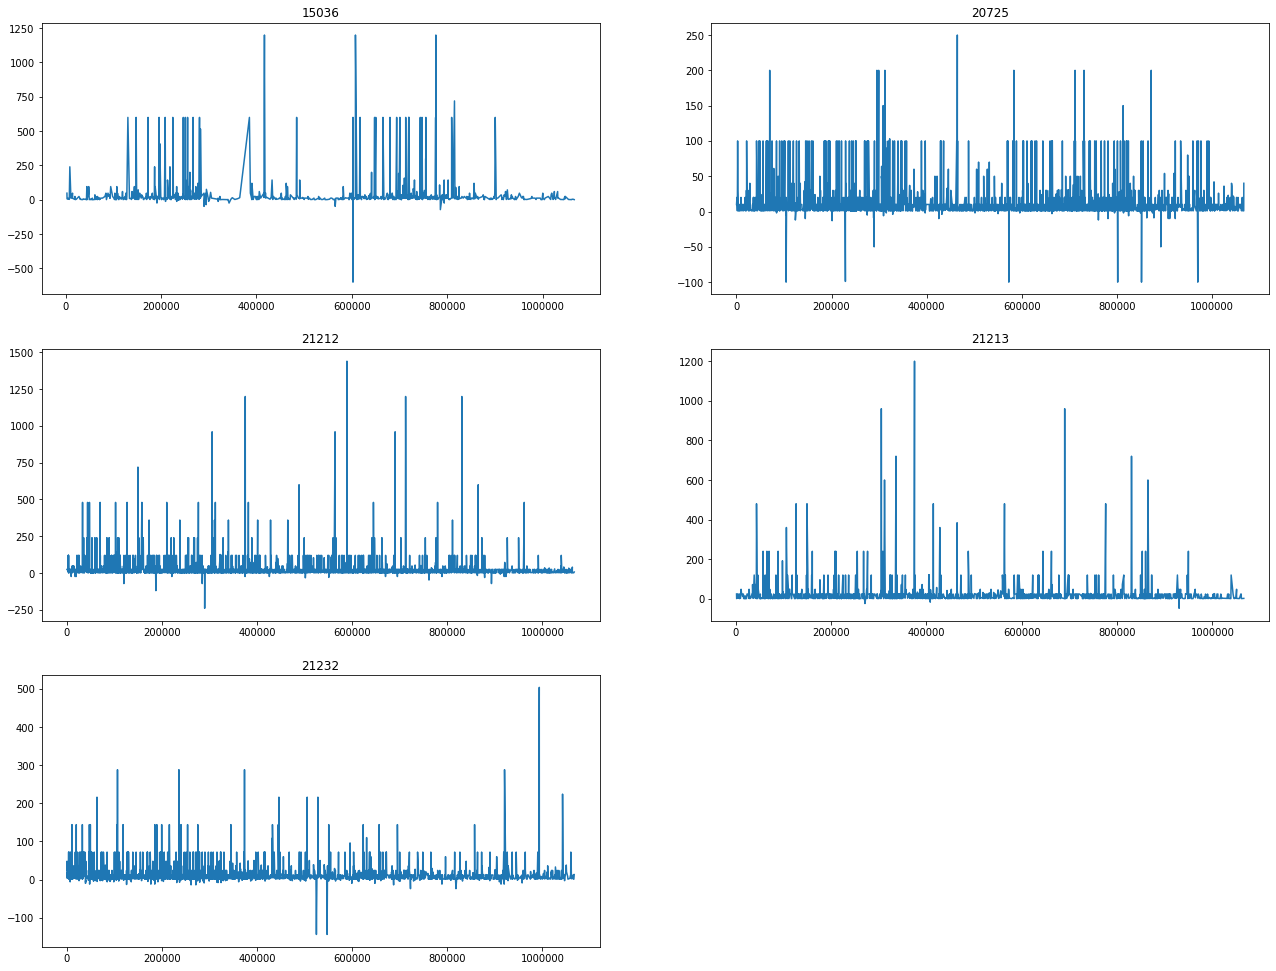

In [40]:
plt.figure(figsize = (22,17))

plt.subplot(3,2,1)
plt.plot(item_15036.Quantity)
plt.title(top20_lst[0])

plt.subplot(3,2,2)
plt.plot(item_20725.Quantity)
plt.title(top20_lst[1])

plt.subplot(3,2,3)
plt.plot(item_21212.Quantity)
plt.title(top20_lst[2])

plt.subplot(3,2,4)
plt.plot(item_21213.Quantity)
plt.title(top20_lst[3])

plt.subplot(3,2,5)
plt.plot(item_21232.Quantity)
plt.title(top20_lst[4])

plt.show()

### Use Dickey Fuller Test to Check For Stationary

In [41]:
print(top20_lst[0],stock_codes[top20_lst[0]])
result0 = adfuller(item_15036.Quantity, autolag = 'AIC')
print(f'p-value {result0[1]}')
#print('\n')
'''
for key, value in result0[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
'''

print(item_15036.Quantity.describe())

15036 {'ASSORTED COLOURS SILK FAN'}
p-value 0.0
count    1016.000000
mean       42.752953
std       127.662436
min      -600.000000
25%         5.000000
50%        12.000000
75%        24.000000
max      1200.000000
Name: Quantity, dtype: float64


In [42]:
print(top20_lst[1],stock_codes[top20_lst[1]])
result1 = adfuller(item_20725.Quantity, autolag = 'AIC')
print(f'p-value {result1[1]}')
#print('\n')
'''
for key, value in result0[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
'''

print(item_20725.Quantity.describe())

20725 {'LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED SPOTTY'}
p-value 0.0
count    3219.000000
mean       12.442063
std        22.765115
min      -100.000000
25%         2.000000
50%        10.000000
75%        10.000000
max       250.000000
Name: Quantity, dtype: float64


In [43]:
print(top20_lst[2],stock_codes[top20_lst[2]])
result2 = adfuller(item_21212.Quantity, autolag = 'AIC')
print(f'p-value {result2[1]}')
#print('\n')
'''
for key, value in result0[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
'''

print(item_21212.Quantity.describe())

21212 {'PACK OF 72 RETRO SPOT CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES'}
p-value 0.0
count    3317.000000
mean       28.776304
std        73.539839
min      -240.000000
25%         2.000000
50%        24.000000
75%        24.000000
max      1440.000000
Name: Quantity, dtype: float64


In [44]:
print(top20_lst[3],stock_codes[top20_lst[3]])
result3 = adfuller(item_21213.Quantity, autolag = 'AIC')
print(f'p-value {result3[1]}')
#print('\n')
'''
for key, value in result0[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
'''

print(item_21213.Quantity.describe())

21213 {'PACK OF 72 SKULL CAKE CASES'}
p-value 0.0
count    1551.000000
mean       26.205029
std        72.979081
min       -48.000000
25%         2.000000
50%         8.000000
75%        24.000000
max      1200.000000
Name: Quantity, dtype: float64


In [45]:
print(top20_lst[4],stock_codes[top20_lst[4]])
result4 = adfuller(item_21232.Quantity, autolag = 'AIC')
print(f'p-value {result4[1]}')
#print('\n')
'''
for key, value in result0[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
'''

print(item_21232.Quantity.describe())

21232 {'STRAWBERRY CERAMIC TRINKET BOX', 'STRAWBERRY CERAMIC TRINKET POT'}
p-value 0.0
count    2675.000000
mean       14.243364
std        27.100429
min      -144.000000
25%         2.000000
50%        10.000000
75%        12.000000
max       504.000000
Name: Quantity, dtype: float64


### ARIMA Modeling - Auto ARIMA
> compares different parameters of ARIMA

In [46]:
def arimamodel(series):
    autoarima_model = pmd.auto_arima(series,
                                     p0 = 0,
                                     q0 = 0,
                                     trace = True)
    return autoarima_model

In [47]:
y0_train, y0_test = train_test_split(item_15036.Quantity)
y1_train, y1_test = train_test_split(item_20725.Quantity)
y2_train, y2_test = train_test_split(item_21212.Quantity)
y3_train, y3_test = train_test_split(item_21213.Quantity)
y4_train, y4_test = train_test_split(item_21232.Quantity)

In [48]:
arima_model0 = arimamodel(y0_train)
arima_model0.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9539.394, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9532.129, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9534.128, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9534.137, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9611.075, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9536.137, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.618 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  762
Model:                        SARIMAX   Log Likelihood               -4764.064
Date:                Thu, 14 Jan 2021   AIC                           9532.129
Time:                        13:06:07   BIC                           9541.400
Sample:                             0   HQIC                          9535.699
                                - 762                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     42.0486      8.786      4.786      0.000      24.828      59.269
sigma2      1.578e+04    389.399     40.513      0.000     1.5e+04    1.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             31801.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             4.85
Prob(H) (two-sided):                  0.03   Kurtosis:                        33.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
arima_model1 = arimamodel(y1_train)
arima_model1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21742.566, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21735.914, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21737.913, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21737.913, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22410.985, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21739.914, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.791 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2414
Model:                        SARIMAX   Log Likelihood              -10865.957
Date:                Thu, 14 Jan 2021   AIC                          21735.914
Time:                        13:06:09   BIC                          21747.492
Sample:                             0   HQIC                         21740.125
                               - 2414                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.4089      0.777     15.967      0.000      10.886      13.932
sigma2       475.5979      7.201     66.046      0.000     461.484     489.712
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             46873.17
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             3.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
arima_model2 = arimamodel(y2_train)
arima_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28199.778, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=28193.485, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28195.106, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28195.124, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28551.366, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=28197.143, Time=0.34 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.448 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2487
Model:                        SARIMAX   Log Likelihood              -14094.743
Date:                Thu, 14 Jan 2021   AIC                          28193.485
Time:                        13:06:11   BIC                          28205.123
Sample:                             0   HQIC                         28197.711
                               - 2487                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.6192      2.530     10.916      0.000      22.660      32.578
sigma2      4899.3488     28.956    169.202      0.000    4842.597    4956.101
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):           2301654.03
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            10.18
Prob(H) (two-sided):                  0.40   Kurtosis:                       150.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
arima_model3 = arimamodel(y3_train)
arima_model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13148.191, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13140.808, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13142.541, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13142.567, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13283.950, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13144.550, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.019 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1163
Model:                        SARIMAX   Log Likelihood               -6568.404
Date:                Thu, 14 Jan 2021   AIC                          13140.808
Time:                        13:06:12   BIC                          13150.926
Sample:                             0   HQIC                         13144.625
                               - 1163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.0249      4.234      5.910      0.000      16.726      33.324
sigma2      4711.4207     60.970     77.274      0.000    4591.921    4830.920
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):            396611.44
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             8.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
arima_model4 = arimamodel(y4_train)
arima_model4.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=18954.851, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18948.605, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18950.081, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18950.056, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19405.872, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=18952.122, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2006
Model:                        SARIMAX   Log Likelihood               -9472.303
Date:                Thu, 14 Jan 2021   AIC                          18948.605
Time:                        13:06:14   BIC                          18959.813
Sample:                             0   HQIC                         18952.720
                               - 2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7941      0.885     15.592      0.000      12.060      15.528
sigma2       739.5882      5.368    137.778      0.000     729.067     750.109
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):            527395.54
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             6.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
def results(pred, y_train, y_test):
    #pred = pred.astype('float32')
    in_pred = pred.predict(0,len(y_train)-1)
    
    out_pred = pred.forecast(len(y_test))
    
    #print(f'in-predictions: {in_pred[:10]}')
    rms1_model = mean_squared_error(in_pred, y_train, squared = False)
    avg1 = [y_train.mean()]*len(y_train)
    #print(avg1[:5])
    rms1_base_case = mean_squared_error(y_train, avg1, squared = False)
    print('Mean Squared Error Model: ',rms1_model)
    print('Mean Squared Error Base Case: ',rms1_base_case)
    
    
    
    #print(f'\nout-predictions: {out_pred[0][:10]}')
    rms2_model = mean_squared_error(out_pred[0],y_test, squared = False)
    avg2 = [y_test.mean()]*len(y_test)
    #print(avg2[:5])
    rms2_base_case = mean_squared_error(y_test, avg2, squared = False)
    print('Mean Squared Error Model: ',rms2_model)
    print('Mean Squared Error Base Case: ', rms1_base_case)
    
    

In [54]:
y0_train = y0_train.astype('float32')
item0 = ARIMA(y0_train, arima_model0.order)
item0_fit = item0.fit()
y0_test = y0_test.astype('float32')
results(item0_fit, y0_train, y0_test)

Mean Squared Error Model:  125.60151550727548
Mean Squared Error Base Case:  125.60151964351883
Mean Squared Error Model:  133.42183268051156
Mean Squared Error Base Case:  125.60151964351883


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [55]:
y1_train = y1_train.astype('float32')
item1 = ARIMA(y1_train, arima_model0.order)
item1_fit = item1.fit()
y1_test = y1_test.astype('float32')
results(item1_fit, y1_train, y1_test)

Mean Squared Error Model:  21.808208198773254
Mean Squared Error Base Case:  21.808208307460678
Mean Squared Error Model:  25.40699864585318
Mean Squared Error Base Case:  21.808208307460678


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [56]:
y2_train = y2_train.astype('float32')
item2 = ARIMA(y2_train, arima_model2.order)
item2_fit = item2.fit()
y2_test = y2_test.astype('float32')
results(item2_fit, y2_train, y2_test)

Mean Squared Error Model:  69.99534819447166
Mean Squared Error Base Case:  69.99534823215187
Mean Squared Error Model:  83.25491815336912
Mean Squared Error Base Case:  69.99534823215187


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [57]:
y3_train = y3_train.astype('float32')
item3 = ARIMA(y3_train, arima_model3.order)
item3_fit = item3.fit()
y3_test = y3_test.astype('float32')
results(item3_fit, y3_train, y3_test)

Mean Squared Error Model:  68.63978813153595
Mean Squared Error Base Case:  68.63978949837995
Mean Squared Error Model:  84.61548075817855
Mean Squared Error Base Case:  68.63978949837995


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
y4_train = y4_train.astype('float32')
item4 = ARIMA(y4_train, arima_model4.order)
item4_fit = item4.fit()
y4_test = y4_test.astype('float32')
results(item4_fit, y4_train, y4_test)

Mean Squared Error Model:  27.1953714012774
Mean Squared Error Base Case:  27.1953713089603
Mean Squared Error Model:  26.808306767409416
Mean Squared Error Base Case:  27.1953713089603


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [59]:
def results2(pred, y_train, y_test):
    #pred = pred.astype('float32')
    in_pred = pred.predict(0,len(y_train)-1)
    
    out_pred = pred.forecast(len(y_test))
    
    #print(f'in-predictions: {in_pred[:10]}')
    rms1_model = mean_squared_error(in_pred, y_train, squared = False)
    avg1 = [y_train.mean()]*len(y_train)
    #print(avg1[:5])
    rms1_base_case = mean_squared_error(y_train, avg1, squared = False)
    print('Mean Squared Error Model: ',rms1_model)
    print('Mean Squared Error Base Case: ',rms1_base_case)
    
    
    
    #print(f'\nout-predictions: {out_pred[0][:10]}')
    rms2_model = mean_squared_error(out_pred,y_test, squared = False)
    avg2 = [y_test.mean()]*len(y_test)
    #print(avg2[:5])
    rms2_base_case = mean_squared_error(y_test, avg2, squared = False)
    print('Mean Squared Error Model: ',rms2_model)
    print('Mean Squared Error Base Case: ', rms1_base_case)
    
    

## Single Exponential Smoothing Model

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [61]:
modelss = SimpleExpSmoothing(y0_train)
modelssfit = modelss.fit()
results2(modelssfit, y0_train, y0_test)

Mean Squared Error Model:  126.05168380356068
Mean Squared Error Base Case:  125.60151964351883
Mean Squared Error Model:  133.62509698940212
Mean Squared Error Base Case:  125.60151964351883


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [62]:
modelss1 = SimpleExpSmoothing(y1_train)
modelss1fit = modelss1.fit()
results2(modelssfit, y1_train, y1_test)

Mean Squared Error Model:  34.281598235915915
Mean Squared Error Base Case:  21.808208307460678
Mean Squared Error Model:  35.25115326833735
Mean Squared Error Base Case:  21.808208307460678


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [63]:
modelss2 = SimpleExpSmoothing(y2_train)
modelss2fit = modelss2.fit()
results2(modelssfit, y2_train, y2_test)

Mean Squared Error Model:  71.03524898653629
Mean Squared Error Base Case:  69.99534823215187
Mean Squared Error Model:  83.26113751073892
Mean Squared Error Base Case:  69.99534823215187


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [64]:
modelss3 = SimpleExpSmoothing(y3_train)
modelss3fit = modelss3.fit()
results2(modelssfit, y3_train, y3_test)

Mean Squared Error Model:  70.49420172803691
Mean Squared Error Base Case:  68.63978949837995
Mean Squared Error Model:  84.79318852217233
Mean Squared Error Base Case:  68.63978949837995


C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [65]:
modelss4 = SimpleExpSmoothing(y4_train)
modelss4fit = modelss4.fit()
results2(modelssfit, y4_train, y4_test)

Mean Squared Error Model: 

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\D-9\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



 37.208526921754505
Mean Squared Error Base Case:  27.1953713089603
Mean Squared Error Model:  34.247545648061795
Mean Squared Error Base Case:  27.1953713089603


## Improving Inventory 

### Examine least popular items, items under quantity average

In [66]:
least_purchase = inv_data[['Quantity',
                           'StockCode',
                           'Description']].groupby('StockCode').agg({'Quantity': 'sum',
                                                                    'Description': lambda x: set(x)})
least_purchase = least_purchase.sort_values('Quantity')
quan_avg = least_purchase['Quantity'].mean()
#print(quan_avg)
least_purchase[least_purchase['Quantity'] < quan_avg].head()

,Quantity,Description
StockCode,,
20879,-27,{TREE OF NOAH FESTIVE SCENTED CANDLE}
21701,-12,{SET 6 MINI SUSHI SET FRIDGE MAGNETS}
35976B,-11,{WHITE SCANDINAVIAN HEART CHRISTMAS}
22003,-10,{VINTAGE BLUE VACUUM FLASK 0.5L }
79301,-5,{FEATHER HEART LIGHTS}


### Examine popular items during the holidays

In [78]:
inv_holidays = inv_data[(inv_data['DateTime']>'2009-10-01 00:00:00') & 
                        (inv_data['DateTime']<'2010-01-31 00:00:00')]

holiday_purchase = inv_holidays[['Quantity', 
                           'StockCode',
                           'Description']].groupby('StockCode').agg({'Quantity':'sum',
                                                                     'Description' : lambda x:set(x)})
holiday_purchase = holiday_purchase.sort_values('Quantity', ascending = False)
holiday_purchase.head(10)

,Quantity,Description
StockCode,,
85123A,11606,{WHITE HANGING HEART T-LIGHT HOLDER}
20993,10916,{JAZZ HEARTS MEMO PAD}
21212,8747,{PACK OF 72 RETRO SPOT CAKE CASES}
85099B,7333,{JUMBO BAG RED WHITE SPOTTY }
20991,7080,{JAZZ HEARTS MAGNETIC MEMO PAD}
37410,6384,{BLACK AND WHITE PAISLEY FLOWER MUG}
21980,6213,{PACK OF 12 RED SPOTTY TISSUES }
16044,6145,{POP-ART FLUORESCENT PENS}
84879,6143,{ASSORTED COLOUR BIRD ORNAMENT}


# <center> III CONCLUSIONS

Conducted tests on most popular items sold (top 5) - model the items and compare against base case.

> Model I: ARIMA
>> The model performed slightly better than the base case (average), but not significant enough for improvements or predictions. Data Set is not predictable.

> Model II: Single Exponential Smoothing
>> The model performed below the base case (average). Did not meet expectations.

Data Sets were not predictable with Time Series Analysis - potentially other models maybe used to better predict the quantities being sold. Such as supervised Learnings, further studies need to be conducted and compared. In conclusion, the best result is to use the average quantity of items being sold. The simplicity of this model can also be improved by measuring averages by weeks, months and annual. By utilizing the average, we can forecast future quantities. Items in inventory can be decreased based on estimation of the averages and by examining the items least sold list (mentioned previously)